# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Feb 6, 11 PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Anchit Vijayakumar 

Student ID: 1007014035

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
import pandas as pd
import numpy as np

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.5]**
* How many features do we have in this dataset? ___
* What are the target classes? ___
* What do these target classes signify?  ___
* How many participants tested `Malignant`? ___
* How many participants tested `Benign`? ___

In [ ]:
dir(load_breast_cancer())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
#Creating a dataframe called data which includes all the data and the feature names as its column headings
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Converting the target array to a dataframe called target and naming the column heading as 'target class'
target = pd.DataFrame(dataset.target)
target.columns = ['target class']


In [ ]:
#Combining the two dataframes 'data' and 'target' into a single dataframe as 'df'
df = pd.concat([data,target], axis = 1)     #axis = 1 means to arrange the data vertically in a column
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
#How many features do we have in this dataset?
features = len(dataset.feature_names)
print('There are %d features in this dataset' %features)

There are 30 features in this dataset


In [ ]:
#What are the target classes?
print('The target classes are', np.unique(dataset.target) , 'which represents', dataset.target_names)


The target classes are [0 1] which represents ['malignant' 'benign']


**What does the Target Class signify:** The target is  the output of the input variables. It is allways represented in numerical format from 0 to n numbers. For this particular dataset '0' and '1' indicates whether the output is 'Malignant' or 'Benign' respectively.

In [ ]:
#How many participants tested `Malignant`?
malignant_participants = sum(df['target class'] == 0)
print('There are %d malignant participants' %malignant_participants)

#How many participants tested `Benign`?
benign_participants = sum(df['target class'] == 1)
print('There are %d benign participants' %benign_participants)

There are 212 malignant participants
There are 357 benign participants


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is ``mean compactness``, the y-axis is ``mean concavity,`` and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.5]**




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

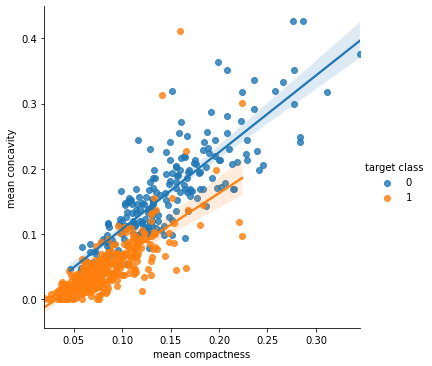

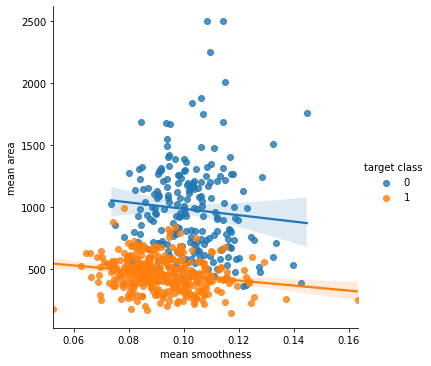

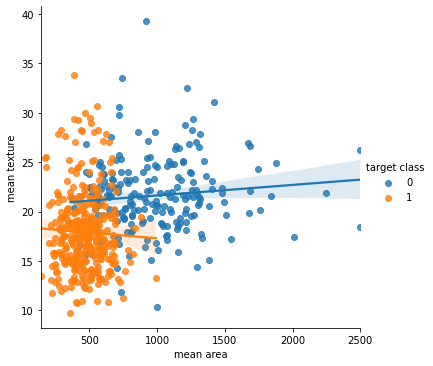

In [ ]:
#Plotting the features along the x and y axis without standardization
sns.lmplot(x='mean compactness', y='mean concavity', hue = 'target class', data=df)
sns.lmplot(x='mean smoothness', y='mean area', hue = 'target class', data=df)
sns.lmplot(x='mean area', y='mean texture', hue = 'target class', data=df)


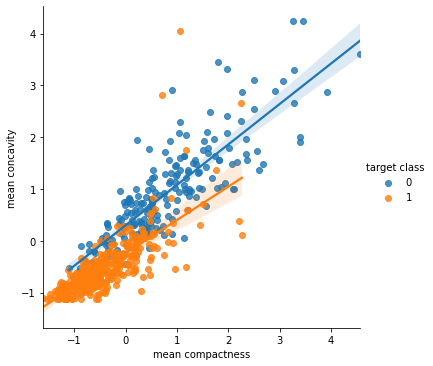

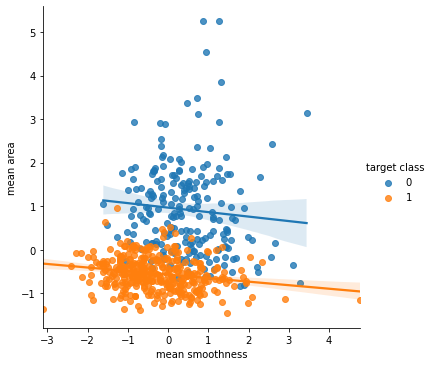

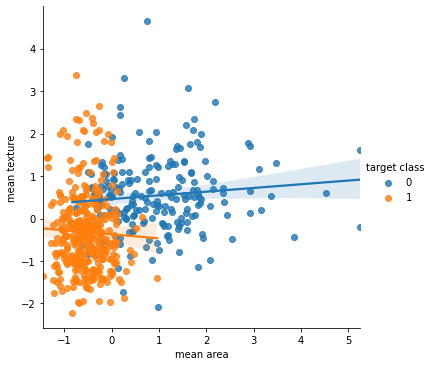

In [ ]:
#Standardization of the features and plotting them again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['mean compactness','mean concavity','mean area','mean texture','mean smoothness','mean perimeter']])
df_stdv = pd.DataFrame(df_std)
df_stdv.columns = ['mean compactness','mean concavity','mean area','mean texture','mean smoothness','mean perimeter']
df_stdv = pd.concat([df_stdv,target], axis = 1)
df_stdv
sns.lmplot(x='mean compactness', y='mean concavity', hue = 'target class', data=df_stdv)
sns.lmplot(x='mean smoothness', y='mean area', hue = 'target class', data=df_stdv)
sns.lmplot(x='mean area', y='mean texture', hue = 'target class', data=df_stdv)


# **The Advantage of Standardization and it's Effect**: 
1) We standardize our data so that all the features have the same scale and contribute equally to the result. As there is a chance that higher weightage is given to features with higher magnitude. Therefore, it will be biassed towards a specific feature.

2) For our data the plot is identical as the scale for our features are the same but if the scales were drastically different b/w features then the graph would be difficult to read and the data would lead to bias during testing.

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
#Splitting the dataset into traning and testing set 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
x = dataset.data
y = dataset.target
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  

#printing the shape of the trainig set showing 70% data
x_train.shape


(398, 30)

In [ ]:
#printing the shape of testing set showing 30% data
x_test.shape

(171, 30)

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which `k`s lead to underfitted or overfitted models (you might need to add extra plots to investidgate that!). **[0.5]**




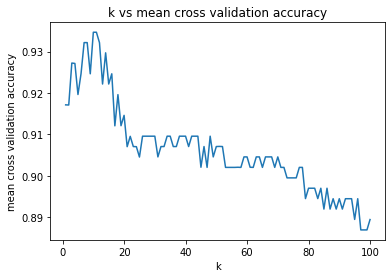

In [ ]:
from sklearn.model_selection import cross_val_score
i = 1    
kv = []
mean_cv = []
#while loop to sweep through k from 1 to 100 and storing the data in mean_cv and kv as a list
while i<=100:
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
    mean_cv.append(np.mean(cv_scores))
    kv.append(i)
    i+=1
#Plotting the k and cv score in order to find the best k
plt.plot(kv, mean_cv)
plt.title('k vs mean cross validation accuracy')
plt.xlabel('k')
plt.ylabel('mean cross validation accuracy')

plt.show()


In [ ]:
#Printing the best 'k' and it's corresponding cv score accuracy
print('The best k value is ', kv[mean_cv.index(max(mean_cv))])
print('The highest cross validation accuracy is', max(mean_cv))

The best k value is  10
The highest cross validation accuracy is 0.9346518987341772


In [ ]:
#The loop is executed from 1-100 and the mean testing and training error is calculated and stored in the error list
test_error = []
train_error = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    train_pred = knn.predict(x_train)
    train_error.append(np.mean(train_pred == y_train))
    test_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Testing Error')

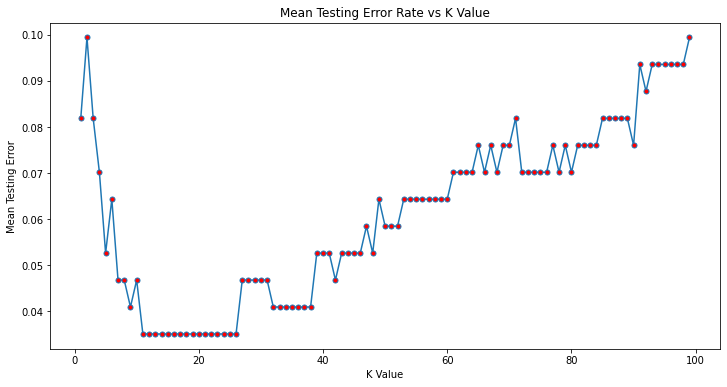

In [ ]:
#Plotting the mean testing error rate vs k value to visualize underfitting and overfitting
plt.figure(figsize=(12, 6))
plt.plot(range(1,100), test_error, marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Mean Testing Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Testing Error')

Text(0, 0.5, 'Mean Training Error')

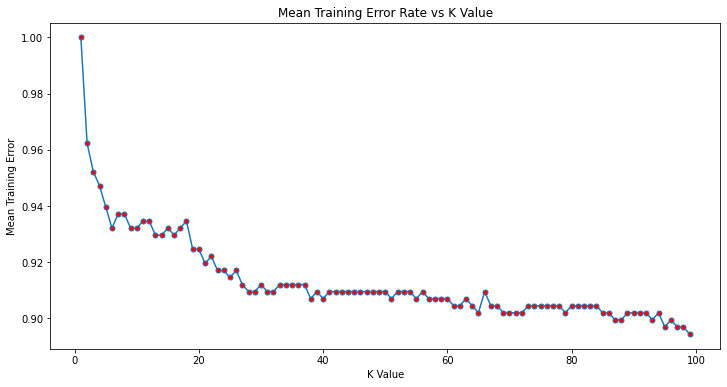

In [ ]:
#Plotting the mean training error rate vs k value to visualize underfitting and overfitting
plt.figure(figsize=(12, 6))
plt.plot(range(1,100), train_error, marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Mean Training Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Training Error')

#Which k's lead to underfitted or overfitted models

From the above two graphs we can see that, when the k-value is low(1 to 14) both the training and testing have high mean error rate therefore it is **underfitted** and when the k-value is high(25 to 100) the testing error also increases and the training error decreases therefore it is **overfitted**. The **ideal k-value** would be around **15 to 22** where both the testing error and training error is minimum.



## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days! instead, we propose an algorithm that can examine each feature's effect with much fewer cases ($F(F+1)/2$). 

design a function that: **[3]**
  1.  Starts training a KNN model on all features, sweeps the ``k`` (besides 1 to 100, you can use any reasonable/smaller window size you like), and find the highest cross-validation accuracy (similar to part 2). 
  2.  In a for loop, we remove one feature at a time. For example, if we have 10 features overall (f0, f1 ... f9), first we only remove f0, train the model with those 9 remaining features (f1,f2,..f9) and compute the cross-validation accuracy (while sweeping k, of course) and store the best cross-validation score in an element of an array-like `Scores[0]`.
  3.  We are going to remove only f1 from the original features and train the model on the remaining 9 features (f0,f2,..f9), find the best cross-validation score, and store it in the ``Scores[1]``. we repeat until we tried all the features once (we filled ``Scores[9]``). 

  4.  Now, we take a look at the ``Scores`` array. We are looking to find out removing which feature hurts accuracy the least. For example, if ``Scores[2]`` is the maximum value of the ``Scores`` array, it shows removing ``f2`` had the least effect on our accuracy (i.e., f2 was not providing useful information for our model).

  5.  Therefore, we permanently remove that feature (f2) and start the loop again. Now we have 9 features (f0,f1,f3...f9) and will try to remove another one. The process is the same, go back to step 2 and try removing another feature. 

  6. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if ``threshold=0.95`` we do not continue removing features if our cross-validation accuracy is bellow ``0.95 * Full Feature cross-validation accuracy (step 1)`` .

  7. Your function will return 2 arrays, a list of removed features, and the corresponding cross-validation accuracy when that feature was removed. 



```
Feature_selector (training_data, threshold)
>>>returns: Removed_features_list , Cross_validartion_accuracy
```


* Run your function on the original training data with a threshold of 0.95\%. **[1]**
  * Plot the Cross-validation accuracy (Y-Axis) vs. the Number of features. 

In [ ]:
#Creating a function called feature selector
def Feature_selector (training_data, target_data, threshold = .95):
    x1 = dataset.data
    y1 = dataset.target
    n = 1
    high_acc = []
    #While loop is used to sweep through k to get the highest cv accuracy to use in threshold 
    while n<=100:
        knnc = KNeighborsClassifier(n_neighbors=n)
        cv_score = cross_val_score(knnc, x1, y1, cv=5)
        high_acc.append(np.mean(cv_score))
        n += 1
    cvscore = max(high_acc)
    threshold = cvscore * threshold
    data = pd.DataFrame(training_data, columns = dataset.feature_names)
    y = target_data
    removed_feature_list = []
    cross_validation_acc = []
    org_len = len(data.columns)
    indexes = range(len(data.columns))
    max_score = threshold
#While loop is used to break the loop if there is only 1 feature left or if the accuracy goes below threshold
    while max_score >= threshold and (org_len - len(removed_feature_list)) > 1:
        Scores = [0]*30 #scores list is created to store all cv scores 
        #This loop is used to remove the columns one by one 
        for f in set(indexes) - set(removed_feature_list):
            to_drop = list(set(removed_feature_list + [f]))
            x = data.drop(data.columns[to_drop], axis = 1)
            cv_scores = []
            #for loop is used to sweep through k the values
            for n in range(1,101):
                knn = KNeighborsClassifier(n_neighbors=n)
                cv_score = cross_val_score(knn, x, y, cv=5)
                cv_scores.append(np.mean(cv_score))
            Scores[f] = max(cv_scores)
        max_score = max(Scores)
        removed_feature_lists = Scores.index(max(Scores)) 
        cross_validation_acc.append(max(Scores))
        removed_feature_list.append(removed_feature_lists)
    return removed_feature_list , cross_validation_acc



ret = (Feature_selector(dataset.data, dataset.target, threshold = .95))


print('The removed features are: ', dataset.feature_names[ret[0]])
print('The cross validation score for the removed features are: ', ret[1])

    





The removed features are:  ['mean radius' 'mean texture' 'mean perimeter' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'area error' 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'worst texture' 'worst perimeter' 'mean area']
The cross validation score for the removed features are:  [0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.9332401800962584, 0.93324018009

In [ ]:
#Calling the feature selector function on the training data 
tx = (Feature_selector(x_train, y_train, threshold = .95))
print(tx[0]) #Printing the index of the features removed
print(tx[1]) #Printing the accuracy score of the corresponding features removed




[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 2, 24, 25, 26, 27, 28, 29, 22, 13, 3]
[0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9321518987341773, 0.9321202531645569, 0.9145886075949367]


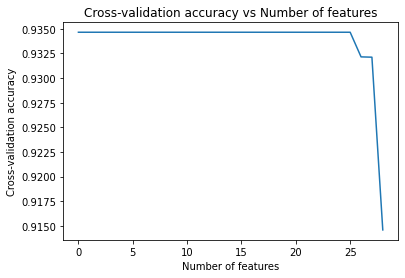

In [ ]:
#List containg numbers 1-29 representing the features for the plot
#nf = list(range(0,29))
#nf 
#Creating a plot between the cv-score and number of features removed
plt.plot(range(0,29),tx[1])
plt.title('Cross-validation accuracy vs Number of features')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation accuracy')
plt.show()

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have standardized and original trainig data vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [ ]:
#Standardization of the training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_x_train = scaler.fit_transform(x_train)
std_x_test = scaler.fit_transform(x_test)


In [ ]:
#Using the feature selector function on the standardized training data
std_data = Feature_selector(std_x_train, y_train, threshold = .95)
print(std_data[0])
print(std_data[1])

[8, 12, 15, 5, 13, 25, 6, 0, 3, 28, 7, 20, 24, 18, 9, 14, 11, 29, 16, 17, 10, 19, 4, 2, 1, 26, 22, 21, 23]
[0.9699683544303797, 0.9724683544303797, 0.9724683544303797, 0.9724683544303797, 0.9724683544303797, 0.9724999999999999, 0.9724999999999999, 0.9724999999999999, 0.9724999999999999, 0.9725000000000001, 0.975, 0.975, 0.975, 0.9724683544303797, 0.975, 0.975, 0.9799683544303797, 0.985, 0.9824999999999999, 0.9824999999999999, 0.9824999999999999, 0.9824999999999999, 0.9775, 0.9775, 0.9724999999999999, 0.9674050632911392, 0.9674050632911392, 0.9496518987341773, 0.9246202531645569]


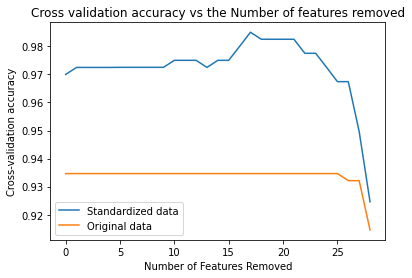

In [ ]:
#Creating a plot b/w standard training data, original training data and number of features removed
plt.plot(range(0,29), std_data[1], label = 'Standardized data')
plt.plot(range(0,29), tx[1], label = 'Original data')
plt.title('Cross validation accuracy vs the Number of features removed')
plt.xlabel("Number of Features Removed")
plt.ylabel('Cross-validation accuracy')
plt.legend()
plt.show()

### **Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy?**


1) In our model, **standardizing** the training data has **improved** it's overall performnace by increasing it's accuracy from **93.46% to 96.74%.**

2) Further, after calling the **function Feature selector** on the standardized data and removing the unnecessary features the accuracy **further increased to 98.5%**. A graph was plotted b/w CV-Score and K in order to find the best 'K' value for our model as well.

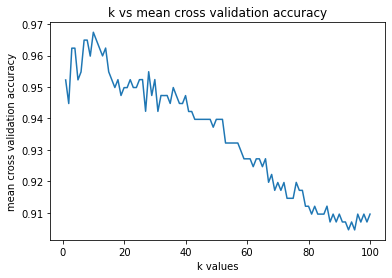

In [ ]:
#Sweeping the k for standard training data but w/o using the feature selector function
from sklearn.model_selection import cross_val_score
i = 1
bestk_value1 = []
best_cv1 = []
while i<=100:
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn, std_x_train, y_train, cv=5)
    best_cv1.append(np.mean(cv_scores))
    bestk_value1.append(i)
    i+=1
#Plotting b/w k and cv score to get best k 
plt.plot(bestk_value1, best_cv1)
plt.title('k vs mean cross validation accuracy')
plt.xlabel('k values')
plt.ylabel('mean cross validation accuracy')

plt.show()

In [ ]:
#Printing the best k and accuracy for the standard training data w/o using the feature selector funtion
print('The best k value is ', bestk_value1[best_cv1.index(max(best_cv1))])
print('The highest cross validation accuracy is', max(best_cv1))

The best k value is  10
The highest cross validation accuracy is 0.9674367088607594


In [ ]:
#Creating a dataframe for both the standard training and testing data
std_x_traindf = pd.DataFrame(std_x_train, columns = dataset.feature_names)
std_x_testdf = pd.DataFrame(std_x_test, columns = dataset.feature_names)

#std_x_testdf.shape
#mod_std_x_train = std_x_train.drop(columns(rm_features))


In [ ]:
#List of indexes of the features removed after standardizing the data 
fet = std_data[1].index(max(std_data[1])) + 1
which_features = std_data[0][0:fet]
rm_features = dataset.feature_names[which_features]
which_features 

[8, 12, 15, 5, 13, 25, 6, 0, 3, 28, 7, 20, 24, 18, 9, 14, 11, 29]

In [ ]:
#List of features to be removed from the standard data to get the best accuracy  
rm_features

array(['mean symmetry', 'perimeter error', 'compactness error',
       'mean compactness', 'area error', 'worst compactness',
       'mean concavity', 'mean radius', 'mean area', 'worst symmetry',
       'mean concave points', 'worst radius', 'worst smoothness',
       'symmetry error', 'mean fractal dimension', 'smoothness error',
       'texture error', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#Removing the features that aren't necessary for the best model from both the training and testing data
mod_std_x_train = std_x_traindf.drop(std_x_traindf.columns[which_features], axis = 1)
mod_std_x_test = std_x_testdf.drop(std_x_testdf.columns[which_features], axis = 1)


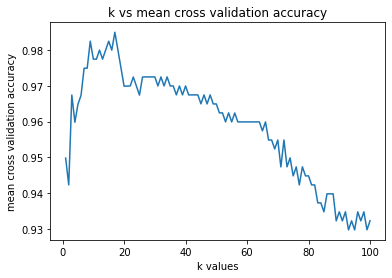

In [ ]:
#Sweeping the k for standard training data afte applying the feature selector function
from sklearn.model_selection import cross_val_score
i = 1
bestk_value = []
best_cv = []
while i<=100:
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn, mod_std_x_train, y_train, cv=5)
    best_cv.append(np.mean(cv_scores))
    bestk_value.append(i)
    i+=1
#Plotting b/w k and cv score to get best k 
plt.plot(bestk_value, best_cv)
plt.title('k vs mean cross validation accuracy')
plt.xlabel('k values')
plt.ylabel('mean cross validation accuracy')

plt.show()

In [ ]:
#The best k value and cv accuracy after applying feature selector function on the standardized training data
K_value = bestk_value[best_cv.index(max(best_cv))]
print('The best k value is ', K_value)
print('The highest cross validation accuracy is', max(best_cv))

The best k value is  17
The highest cross validation accuracy is 0.985


In [ ]:
#How many features were removed?
print('The number of features removed from the standard data is:',len(rm_features))

The number of features removed from the standard data is: 18


In [ ]:
#Which features were removed?
print("In order to get the best accuracy the removed features are:", rm_features)

In order to get the best accuracy the removed features are: ['mean symmetry' 'perimeter error' 'compactness error' 'mean compactness'
 'area error' 'worst compactness' 'mean concavity' 'mean radius'
 'mean area' 'worst symmetry' 'mean concave points' 'worst radius'
 'worst smoothness' 'symmetry error' 'mean fractal dimension'
 'smoothness error' 'texture error' 'worst fractal dimension']


In [ ]:
#What is the best K value?
print('The best K value is:', K_value)

The best K value is: 17


After testing the various models the **best K value is 17** and the **accuracy score is 98.5%**. 

The Feature selector function was used to **remove 18 features** and they are: 

**1)Mean symmetry   2)perimeter error   3)compactness error    4)mean compactness,   5)area error,     6)worst compactness    7)mean concavity    8)mean radius   9)mean area    10)worst symmetry    11)mean concave points    12)worst radius   13)worst smoothness       14)symmetry error    15)mean fractal dimension   16)smoothness error    17)texture error   18)worst fractal dimension**



## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [ ]:
from sklearn import neighbors
from sklearn import metrics


In [ ]:
#Testing the modified training data with the best model 'K_value = 17' to get the best accuracy
X = mod_std_x_train
y = y_train
knn = neighbors.KNeighborsClassifier(n_neighbors = K_value)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [ ]:
#Running the model on the test data
test = knn.predict(mod_std_x_test)

In [ ]:
#Printing the accuracy of the model
print("Accuracy: ", metrics.accuracy_score(y_test, test))

Accuracy:  0.9707602339181286


**Result**: 

 By standardizing and removing the uninformative features from the dataset we improved the accuracy to get the best possible outcome. The final test accuracy is 97% as opposed to 93% which we got on the original training data.